In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import vapeplot
plt.rcParams['svg.fonttype'] = 'none'
%matplotlib inline

from datetime import datetime
def timestamp(): return datetime.today().strftime('%Y%m%d')


In [319]:
df = pd.read_csv("../RESULTS/deepbake.s10.predictions.tsv",sep="\t")
df.head()

,season,baker,week,tech_mean,tech,starbaker_mean,starbaker,judge_fav_mean,judge_fav,judge_unfav_mean,judge_unfav,place,deepbake_tier,week_eliminated,deepbake_prediction,winner_prob,finalist_prob,third_fourth_prob,fifth_seventh_prob,eighth_below_prob
0,10,Alice,1,5.00,5,0.00,0,0.00,0,0.00,0,2,1,10,1,10.98,29.22,16.20,27.80,26.78
1,10,Alice,2,3.00,1,0.50,1,0.50,1,0.00,0,2,1,10,1,36.82,85.81,2.42,9.69,2.09
2,10,Alice,3,4.33,7,0.33,0,0.33,0,0.33,1,2,1,10,1,15.85,36.42,18.81,28.37,16.40
3,10,Alice,4,5.25,8,0.25,0,0.25,0,0.25,0,2,1,10,1,19.81,42.14,25.51,29.55,2.79
4,10,Alice,5,5.40,6,0.20,0,0.20,0,0.20,0,2,1,10,1,7.78,50.49,19.54,27.26,2.71


/Users/tacitus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tacitus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/tacitus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

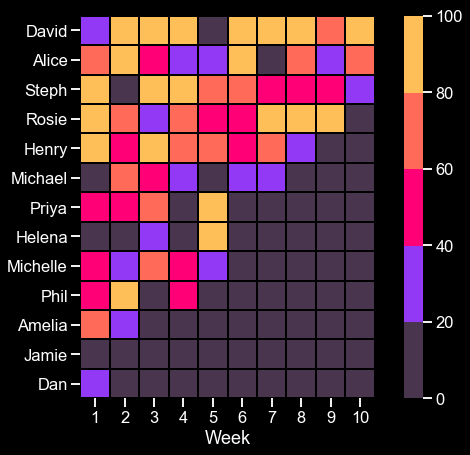

In [39]:
def sort_mat(mat,bakers):
    # sort the matrix
    mat.index = pd.CategoricalIndex(mat.index, categories=bakers)
    mat.sortlevel(level=0, inplace=True)
    return mat
def minmax(df,ft):
    #min-max scaling for the entire matrix
    dat = df[ft]
    scal = [(x-min(dat))/(max(dat)-min(dat))*100 for x in dat]
    return scal
def minmax_week(df,ft):
    # min-max scaling for each week (column normalization)
    dfs = []
    for w in set(df['week']):
        t = df.loc[df['week']==w]
        t[ft] = minmax(t,ft)
        t[ft]= 100-t[ft]
        dfs.append(t)
    return pd.concat(dfs)

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
df = pd.read_csv("../RESULTS/deepbake.s10.predictions.tsv",sep="\t")
df=df.sort_values(by=['place','season'])
bakers = df.loc[df['week']==1]['baker']

probs = ['winner_prob','finalist_prob','third_fourth_prob','fifth_seventh_prob','eighth_below_prob',
        'tech','tech_mean','judge_fav','judge_fav_mean','judge_unfav','judge_unfav_mean','starbaker','starbaker_mean'
        ]

vap = ['#4a354f', '#ffbf58','#ff6b58', '#ff4373','#ff0076','#9239f6']
pal = sns.blend_palette((vap),n_colors=10)

for ft in probs:
    # choose your scaling if needed
    #df[ft] = minmax(df,ft)
    #df = minmax_week(df,ft)
    mat = df.pivot("baker","week",ft)
    mat = sort_mat(mat,bakers)
    
    f, ax = plt.subplots(1,1,figsize=(13/1.5,10/1.5))
    sns.heatmap(
    mat,
    cmap=
        #['#4a354f','#9239f6','#ff0076','#ff6b58','#ffbf58'], # this is better for some plots
        pal,
    linewidths=1,
    ax=ax,
    square=True,
    robust=True,
    linecolor='#000000',
    cbar=True,

    )
    ax.set_xlabel("Week")
    ax.set_ylabel('')
    f.tight_layout()
    f.savefig("../FIGURES/{}.svg".format(ft),dpi=500)
    f.savefig("../FIGURES/{}.png".format(ft),dpi=500)
